In [11]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print('Máy tính đang xử lí ảnh....')
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/nhandiendoan/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('banhbao'):
    output = 0
  if file.startswith('banhmi'):
    output = 1
  if file.startswith('bunbo'):
    output = 2
  if file.startswith('bunrieu'):
    output = 3
  if file.startswith('goicuon'):
    output = 4
  
  photo = load_img(folder + file, target_size=(224,224))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save image data and labels to numpy arrays
save('/content/drive/MyDrive/nhandiendoan/Foods_photos.npy', photos)
save('/content/drive/MyDrive/nhandiendoan/Foods_labels.npy', labels)

Máy tính đang xử lí ảnh....
(50, 224, 224, 3) (50,)


In [4]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/nhandiendoan/Foods_photos.npy')
labels = np.load('/content/drive/MyDrive/nhandiendoan/Foods_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [5]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 5

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       1

In [6]:
#increase data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [8]:
print('Máy tính đang training...')
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)


Máy tính đang training...
Epoch 1/50
2/2 [==============================] - 13s 10s/step - loss: 3.9207 - accuracy: 0.1143
Epoch 2/50
2/2 [==============================] - 12s 1s/step - loss: 1.6093 - accuracy: 0.1714
Epoch 3/50
2/2 [==============================] - 12s 10s/step - loss: 1.6126 - accuracy: 0.2286
Epoch 4/50
2/2 [==============================] - 12s 10s/step - loss: 1.6081 - accuracy: 0.2286
Epoch 5/50
2/2 [==============================] - 12s 1s/step - loss: 1.6054 - accuracy: 0.2286
Epoch 6/50
2/2 [==============================] - 13s 2s/step - loss: 1.6072 - accuracy: 0.2286
Epoch 7/50
2/2 [==============================] - 12s 1s/step - loss: 1.6211 - accuracy: 0.2286
Epoch 8/50
2/2 [==============================] - 12s 10s/step - loss: 1.6085 - accuracy: 0.2286
Epoch 9/50
2/2 [==============================] - 11s 2s/step - loss: 1.6089 - accuracy: 0.2286
Epoch 10/50
2/2 [==============================] - 12s 10s/step - loss: 1.6061 - accuracy: 0.2286
Epoch 11

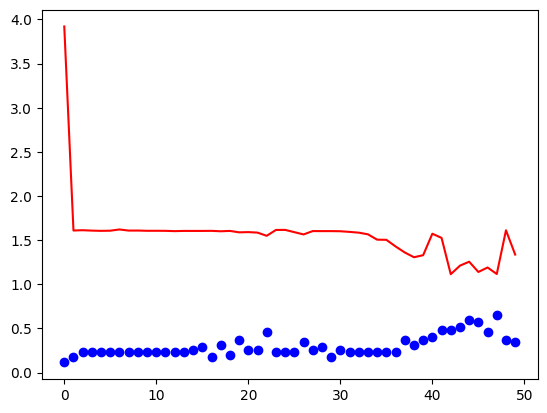

In [9]:
#Watching chart
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [12]:
print('Máy tính đang training lần 2...')
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Máy tính đang training lần 2...
Epoch 1/30
2/2 [==============================] - 16s 14s/step - loss: 0.9613 - accuracy: 0.5714
Epoch 2/30
2/2 [==============================] - 16s 13s/step - loss: 1.0042 - accuracy: 0.6571
Epoch 3/30
2/2 [==============================] - 10s 9s/step - loss: 0.7571 - accuracy: 0.7143
Epoch 4/30
2/2 [==============================] - 12s 1s/step - loss: 0.8671 - accuracy: 0.5143
Epoch 5/30
2/2 [==============================] - 10s 2s/step - loss: 0.8533 - accuracy: 0.6000
Epoch 6/30
2/2 [==============================] - 12s 1s/step - loss: 0.8066 - accuracy: 0.6286
Epoch 7/30
2/2 [==============================] - 13s 1s/step - loss: 0.8409 - accuracy: 0.6286
Epoch 8/30
2/2 [==============================] - 11s 2s/step - loss: 1.0476 - accuracy: 0.5143
Epoch 9/30
2/2 [==============================] - 12s 1s/step - loss: 0.7717 - accuracy: 0.6571
Epoch 10/30
2/2 [==============================] - 10s 9s/step - loss: 0.8366 - accuracy: 0.6571
Epoch

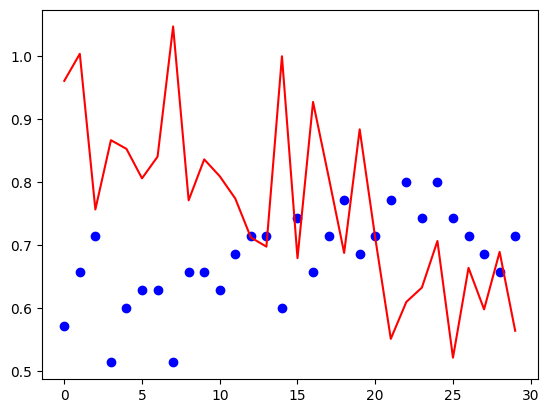

In [13]:
#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [14]:
print('Máy tính đang training lần 3....')
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Máy tính đang training lần 3....
Epoch 1/10
2/2 [==============================] - 15s 2s/step - loss: 0.6293 - accuracy: 0.7143
Epoch 2/10
2/2 [==============================] - 13s 11s/step - loss: 0.6944 - accuracy: 0.7429
Epoch 3/10
2/2 [==============================] - 10s 1s/step - loss: 0.6794 - accuracy: 0.7714
Epoch 4/10
2/2 [==============================] - 13s 9s/step - loss: 0.3882 - accuracy: 0.8000
Epoch 5/10
2/2 [==============================] - 12s 10s/step - loss: 0.4074 - accuracy: 0.7714
Epoch 6/10
2/2 [==============================] - 10s 8s/step - loss: 0.3878 - accuracy: 0.8857
Epoch 7/10
2/2 [==============================] - 14s 11s/step - loss: 0.4478 - accuracy: 0.8286
Epoch 8/10
2/2 [==============================] - 10s 1s/step - loss: 0.7970 - accuracy: 0.7143
Epoch 9/10
2/2 [==============================] - 12s 10s/step - loss: 0.2993 - accuracy: 0.9143
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 743.3341 - accuracy: 0.3333
A

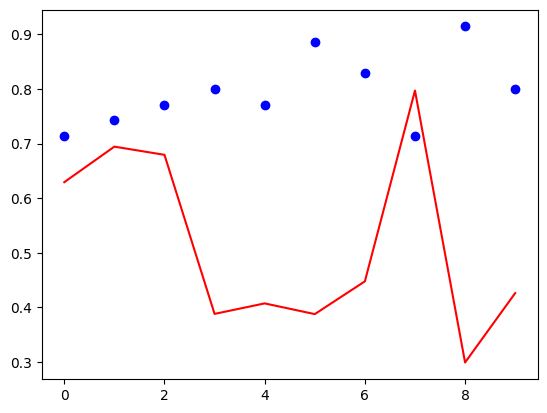

In [15]:
#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [25]:
model.save('/content/drive/MyDrive/nhandiendoan/Foods.h5')

In [26]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/nhandiendoan/Foods.h5')

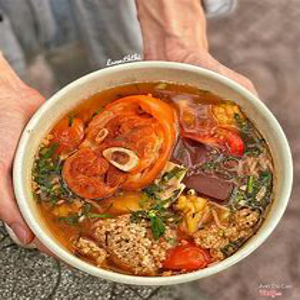

1/1 [==============================] - 0s 224ms/step
['Bún Riêu']


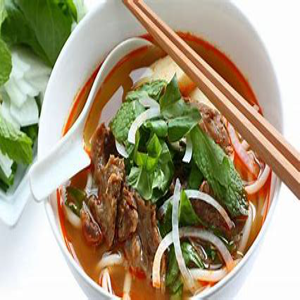

1/1 [==============================] - 0s 117ms/step
['Bún Bò']


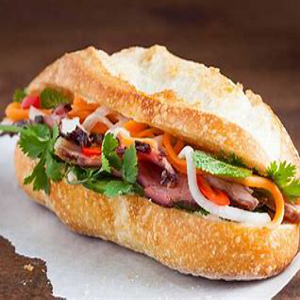

1/1 [==============================] - 0s 106ms/step
['Bánh Mì']


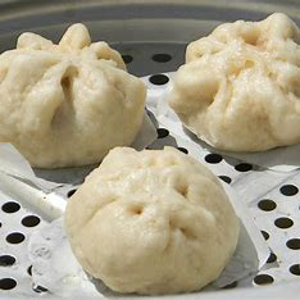

1/1 [==============================] - 0s 103ms/step
['Gỏi Cuốn']


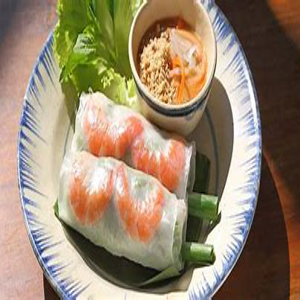

1/1 [==============================] - 0s 149ms/step
['Gỏi Cuốn']


In [29]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['Bánh Bao', 'Bánh Mì', 'Bún Bò', 'Bún Riêu', 'Gỏi Cuốn'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/nhandiendoan/checking data foods'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])
     